## Norm and distance

#### Norm

The *Euclidean norm* of an $n$-vector $x$ (named after the Greek mathematician Euclid), denoted $\|x\|$, is the squareroot of the sum of the squares of its elements,
$$
\|x\|=\sqrt{x_1^2+x_2^2+\cdots+x_n^2} .
$$
The Euclidean norm can also be expressed as the squareroot of the inner product of the vector with itself, i.e., $\|x\|=\sqrt{x^T x}$.

#### Properties of norm.

Some important properties of the Euclidean norm are given below. Here $x$ and $y$ are vectors of the same size, and $\beta$ is a scalar.

- Nonnegative homogeneity. $\|\beta x\|=|\beta|\|x\|$. Multiplying a vector by a scalar multiplies the norm by the absolute value of the scalar.
- Triangle inequality. $\|x+y\| \leq\|x\|+\|y\|$. The Euclidean norm of a sum of two vectors is no more than the sum of their norms. (The name of this property will be explained later.) Another name for this inequality is subadditivity.
- Nonnegativity. $\|x\| \geq 0$.
- Definiteness. $\|x\|=0$ only if $x=0$.

In [1]:
import numpy as np
import numpy.linalg as npl

x = np.array([2, -1, 2])

print(f"Norm of x: {npl.norm(x)}")
print(f"Square root of the inner product of x with itself: {np.sqrt(np.inner(x, x))}")
print(
    f"Square root of the sum of the squares of the elements of x: {np.sqrt(np.sum(np.array(x) ** 2))}"
)


Norm of x: 3.0
Square root of the inner product of x with itself: 3.0
Square root of the sum of the squares of the elements of x: 3.0


In [2]:
x = np.random.randn(10)
y = np.random.randn(10)

print(x.shape, y.shape)

print(f"Norm of x + y: {npl.norm(x + y)}")
print(f"Norm of x + Norm of y: {npl.norm(x) + npl.norm(y)}")

# the triangle inequality
print(npl.norm(x + y) <= npl.norm(x) + npl.norm(y))

(10,) (10,)
Norm of x + y: 3.5346435930347297
Norm of x + Norm of y: 5.673623831927874
True


#### Root-mean-square value.

The norm is related to the *root-mean-square* (RMS) value of an $n$-vector $x$, defined as
$$
\operatorname{rms}(x)=\sqrt{\frac{x_1^2+\cdots+x_n^2}{n}}=\frac{\|x\|}{\sqrt{n}} .
$$
The argument of the squareroot in the middle expression is called the mean square value of $x$, denoted $\mathbf{m s}(x)$, and the RMS value is the squareroot of the mean square value. 

The RMS value of a vector $x$ is useful when comparing norms of vectors with different dimensions; the RMS value tells us what a 'typical' value of $\left|x_i\right|$ is. 

> For example, the norm of $\mathbf{1}$, the $n$-vector of all ones, is $\sqrt{n}$, but its RMS value is 1 , independent of $n$. More generally, if all the entries of a vector are the same, say, $\alpha$, then the RMS value of the vector is $|\alpha|$.

In [3]:
def rms(x):
    return npl.norm(x) / np.sqrt(len(x))


t = np.linspace(0, 1, 101)
x = np.cos(8 * t) - 2 * np.sin(11 * t)

print("average:", np.average(x))
print("root mean square:", rms(x))
print("x:", x)

average: -0.042529437832386816
root mean square: 1.0837556422598
x: [ 1.          0.7772451   0.55076804  0.32325192  0.09735649 -0.12431346
 -0.33923878 -0.54501537 -0.739382   -0.92024623 -1.08570801 -1.23408086
 -1.36391021 -1.47398886 -1.56336921 -1.6313723  -1.67759342 -1.70190437
 -1.7044522  -1.68565468 -1.64619233 -1.58699731 -1.50923924 -1.41430817
 -1.30379488 -1.17946882 -1.04325395 -0.8972028  -0.74346905 -0.58427899
 -0.42190233 -0.25862246 -0.09670686  0.06162219  0.21421621  0.35902793
  0.49413741  0.61777625  0.7283499   0.82445752  0.90490937  0.96874134
  1.01522657  1.04388392  1.05448331  1.04704772  1.02185198  0.97941823
  0.92050825  0.84611263  0.75743703  0.65588565  0.54304213  0.42064812
  0.2905798   0.15482271  0.01544505 -0.12543001 -0.26565282 -0.40307609
 -0.53558374 -0.66111939 -0.7777141  -0.88351311 -0.97680105 -1.05602551
 -1.11981852 -1.16701567 -1.19667275 -1.20807953 -1.20077059 -1.17453306
 -1.12941109 -1.06570712 -0.98397969 -0.88503813 -0.7699

## Distance

#### Euclidean distance.

We can use the norm to define the Euclidean distance between two vectors $a$ and $b$ as the norm of their difference:
$$
\operatorname{dist}(a, b)=\|a-b\|.
$$
For one, two, and three dimensions, this distance is exactly the usual distance between points with coordinates $a$ and $b$. But the Euclidean distance is defined for vectors of any dimension; we can refer to the distance between two vectors of dimension 100. Since we only use the Euclidean norm in this book, we will refer to the Euclidean distance between vectors as, simply, the distance between the vectors. If $a$ and $b$ are $n$-vectors, we refer to the RMS value of the difference, $\|a-b\| / \sqrt{n}$, as the $R M S$ deviation between the two vectors.

#### Examples

> ##### Feature distance
>
> If $x$ and $y$ represent vectors of $n$ features of two objects, the quantity $\|x-y\|$ is called the feature distance, and gives a measure of how different the objects are (in terms of their feature values). Suppose for example the feature vectors are associated with patients in a hospital, with entries such as weight, age, presence of chest pain, difficulty breathing, and the results of tests. We can use feature vector distance to say that one patient case is near another one (at least in terms of their feature vectors).

In [4]:
# np.random.seed(42)

# Number of patients
n_patients = 100

# Generate random features for patients
# Features: [weight (kg), age (years), chest pain (0 or 1),
# difficulty breathing (0 or 1), test result (0-100)]

weights = np.random.normal(70, 15, n_patients)  # Normal distribution around 70 kg
ages = np.random.randint(20, 80, n_patients)  # Ages between 20 and 80
chest_pain = np.random.randint(0, 2, n_patients)  # 0 or 1
difficulty_breathing = np.random.randint(0, 2, n_patients)  # 0 or 1
test_results = np.random.uniform(0, 100, n_patients)  # Test results between 0 and 100

# Combine features into a feature matrix
patient_data = np.column_stack(
    (weights, ages, chest_pain, difficulty_breathing, test_results)
)
# patient_data

In [5]:
# Step 2: Calculate feature distance between two patients
patient_1 = patient_data[0]  # First patient
patient_2 = patient_data[1]  # Second patient
patient_1

array([95.73269058, 47.        ,  0.        ,  0.        , 98.82852991])

In [6]:
# Calculate Euclidean distance (L2 norm) between the two patients
feature_distance = np.linalg.norm(patient_1 - patient_2)

print(f"Feature distance between Patient 1 and Patient 2: {feature_distance:.2f}")

Feature distance between Patient 1 and Patient 2: 54.09


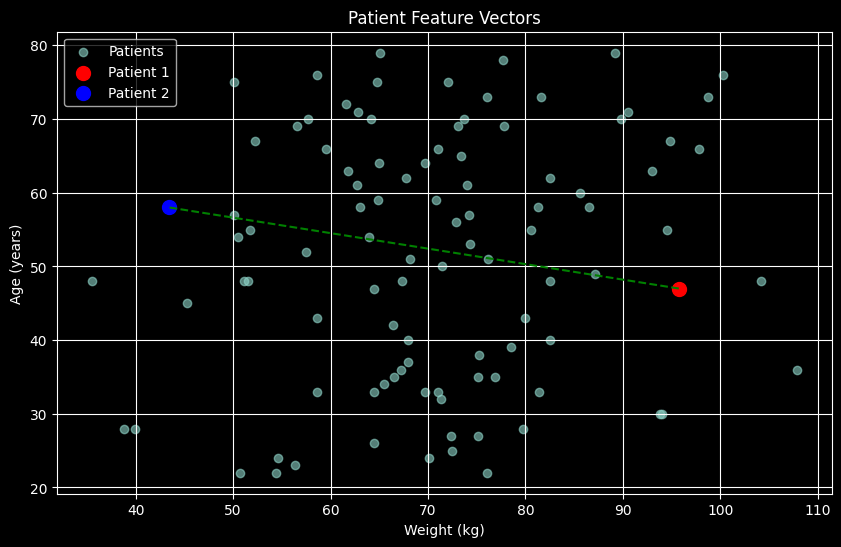

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

# Plot the patients in a 2D space (using weight and age for simplicity)
plt.scatter(patient_data[:, 0], patient_data[:, 1], alpha=0.6, label="Patients")

# Highlight the two patients
plt.scatter(patient_1[0], patient_1[1], color="red", label="Patient 1", s=100)
plt.scatter(patient_2[0], patient_2[1], color="blue", label="Patient 2", s=100)

# Draw a line between the two patients
plt.plot(
    [patient_1[0], patient_2[0]],
    [patient_1[1], patient_2[1]],
    color="green",
    linestyle="--",
)

# Add labels and title
plt.title("Patient Feature Vectors")
plt.xlabel("Weight (kg)")
plt.ylabel("Age (years)")
plt.legend()
plt.grid()
plt.show()
plt.close(fig)



> ##### RMS prediction error
>
> Suppose that the $n$-vector $y$ represents a time series of some quantity, for example, hourly temperature at some location, and $\hat{y}$ is another $n$-vector that represents an estimate or prediction of the time series $y$, based on other information. The difference $y-\hat{y}$ is called the prediction error, and its RMS value $\mathbf{r m s}(y-\hat{y})$ is called the _$R M S$ prediction error_. If this value is small (say, compared to rms $(y)$ ) the prediction is good.


In [8]:
def generate_temperature_data(n, noise_level):
    # Generate time points
    time = np.arange(n)
    # Create a sinusoidal temperature pattern
    temperature = 20 + 10 * np.sin(2 * np.pi * time / 24)  # Daily cycle
    # Add Gaussian noise
    noise = np.random.normal(0, noise_level, n)
    return temperature + noise


def predict_temperature(n):
    # Simple prediction: average temperature over a day
    return 20 + 10 * np.sin(2 * np.pi * np.arange(n) / 24)


def rms_error(y, y_hat):
    return np.sqrt(np.mean((y - y_hat) ** 2))


In [9]:
# Parameters
n_hours = 72  # 3 days of hourly data
noise_level = 2.0  # Standard deviation of noise

# Generate synthetic temperature data
actual_temperature = generate_temperature_data(n_hours, noise_level)
predicted_temperature = predict_temperature(n_hours)

# Calculate RMS prediction error
error = rms_error(actual_temperature, predicted_temperature)
error

np.float64(1.863510634134135)

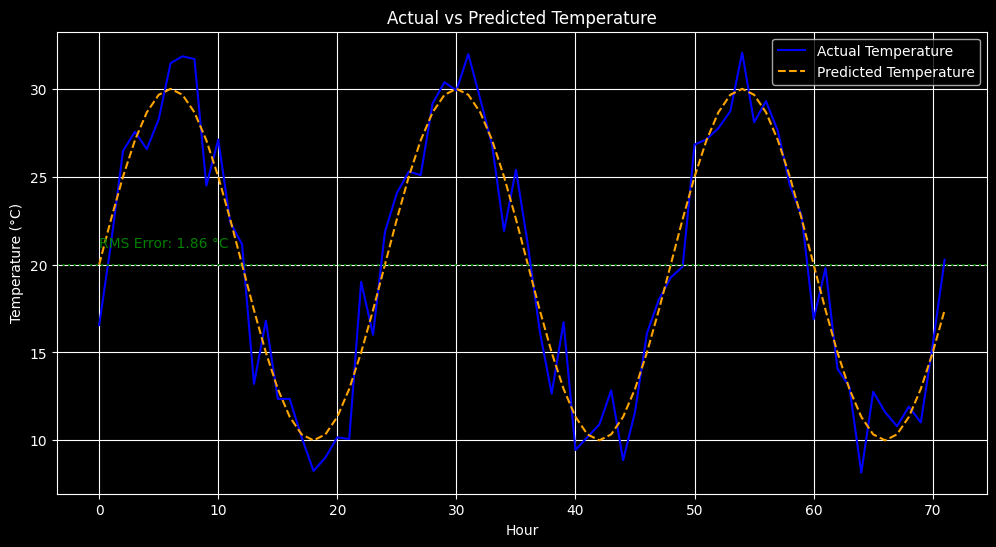

In [10]:
fig = plt.figure(figsize=(12, 6))
plt.plot(actual_temperature, label="Actual Temperature", color="blue")
plt.plot(
    predicted_temperature, label="Predicted Temperature", color="orange", linestyle="--"
)
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.axhline(
    y=np.mean(actual_temperature),
    color="green",
    linestyle=":",
    label="Mean Temperature",
)
plt.text(
    0, np.mean(actual_temperature) + 1, f"RMS Error: {error:.2f} °C", color="green"
)
plt.show()
plt.close(fig)

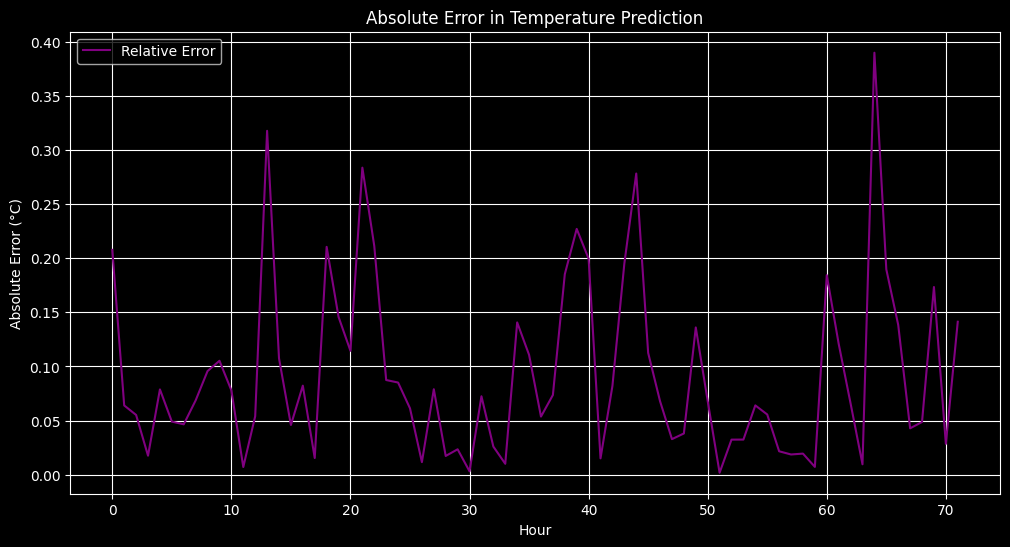

In [11]:
abs_error = np.abs(actual_temperature - predicted_temperature)
relative_error = abs_error / np.abs(actual_temperature)

fig = plt.figure(figsize=(12, 6))
# plt.plot(abs_error, label="Absolute Error", color="red")
plt.plot(relative_error, label="Relative Error", color="purple")
plt.title("Absolute Error in Temperature Prediction")
plt.xlabel("Hour")
plt.ylabel("Absolute Error (°C)")
plt.legend()
plt.grid()
plt.show()
plt.close(fig)


> ##### Document dissimilarity
>
> Suppose $n$-vectors $x$ and $y$ represent the histograms of word occurrences for two documents. Then $\|x-y\|$ represents a measure of the dissimilarity of the two documents. We might expect the dissimilarity to be smaller when the two documents have the same genre, topic, or author; we would expect it to be larger when they are on different topics, or have different authors. 
> 
> As an example we form the word count histograms for the 5 Wikipedia articles with titles 'Veterans Day', 'Memorial Day', 'Academy Awards', 'Golden Globe Awards', and 'Super Bowl', using a dictionary of 4423 words.
>
> |  | Veterans <br> Day | Memorial <br> Day | Academy <br> Awards | Golden Globe <br> Awards | Super Bowl |
> | :--- | :---: | :---: | :---: | :---: | :---: |
> | Veterans Day | 0 | 0.095 | 0.130 | 0.153 | 0.170 |
> | Memorial Day | 0.095 | 0 | 0.122 | 0.147 | 0.164 |
> | Academy A. | 0.130 | 0.122 | 0 | 0.108 | 0.164 |
> | Golden Globe A. | 0.153 | 0.147 | 0.108 | 0 | 0.181 |
> | Super Bowl | 0.170 | 0.164 | 0.164 | 0.181 | 0 |


In [12]:
article_titles = [
    "Veterans Day",
    "Memorial Day",
    "Academy Awards",
    "Golden Globe Awards",
    "Super Bowl",
]

dissimilarity_matrix = np.array(
    [
        [0.0, 0.095, 0.130, 0.153, 0.170],  # Veterans Day
        [0.095, 0.0, 0.122, 0.147, 0.164],  # Memorial Day
        [0.130, 0.122, 0.0, 0.108, 0.164],  # Academy Awards
        [0.153, 0.147, 0.108, 0.0, 0.181],  # Golden Globe Awards
        [0.170, 0.164, 0.164, 0.181, 0.0],  # Super Bowl
    ]
)


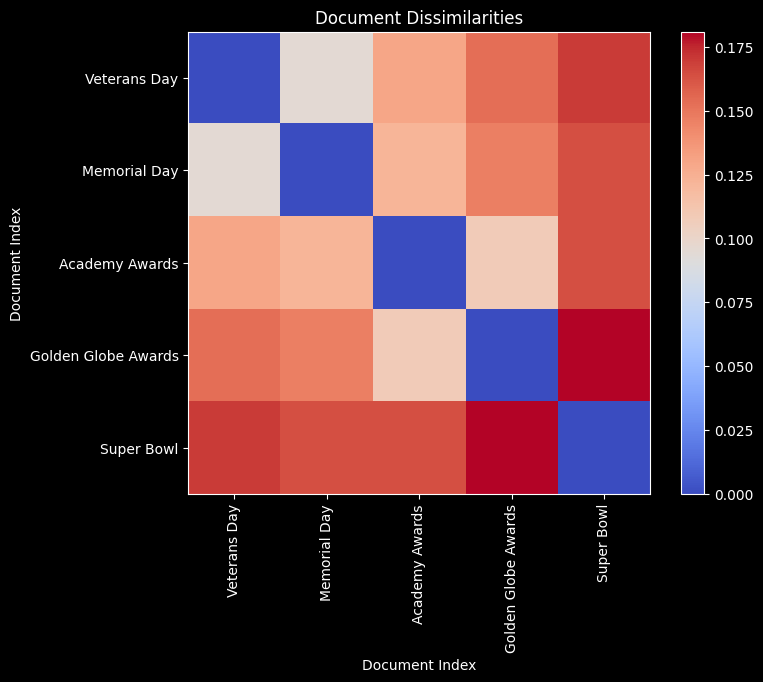

In [13]:
# Create a heatmap of the dissimilarities
fig = plt.figure(figsize=(8, 6))
plt.imshow(
    dissimilarity_matrix,
    cmap="coolwarm",
    interpolation="nearest",
)
plt.title("Document Dissimilarities")
plt.xticks(np.arange(5), article_titles, rotation=90)
plt.yticks(np.arange(5), article_titles)
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.colorbar()
plt.show()
plt.close(fig)



##### Nearest neighbor

Suppose $z_1, \ldots, z_m$ is a collection of $m n$-vectors, and that $x$ is another $n$-vector. We say that $z_j$ is the nearest neighbor of $x$ (among $\left.z_1, \ldots, z_m\right)$ if
$$
\left\|x-z_j\right\| \leq\left\|x-z_i\right\|, \quad i=1, \ldots, m .
$$

**In words:** $z_j$ is the closest vector to $x$ among the vectors $z_1, \ldots, z_m$. The idea of nearest neighbor, and generalizations such as the $k$-nearest neighbors, are used in many applications.


In [14]:
u = np.array([1.8, 2.0, -3.7, 4.7])
v = np.array([0.6, 2.1, 1.9, -1.4])
w = np.array([2.0, 1.9, -4, 4.6])

print(f"The distance between u and v is: {npl.norm(u - v):.2f}")
print(f"The distance between u and w is: {npl.norm(u - w):.2f}")
print(f"The distance between v and w is: {npl.norm(v - w):.2f}")

The distance between u and v is: 8.37
The distance between u and w is: 0.39
The distance between v and w is: 8.53


In [15]:
# You can use this notion of distance to create a "nearest neighbor" function:
def nearest_neighbor(x, z):
    return z[np.argmin([npl.norm(x - y) for y in z])]


z = ([2, 1], [7, 2], [5.5, 4], [4, 8], [1, 5], [9, 6])

pointa, pointb = [5, 6], [3, 3]

print("nearest neighbours of z to the point a: ", nearest_neighbor(np.array(pointa), z))
print("nearest neighbours of z to the point b: ", nearest_neighbor(np.array(pointb), z))

nearest neighbours of z to the point a:  [5.5, 4]
nearest neighbours of z to the point b:  [2, 1]


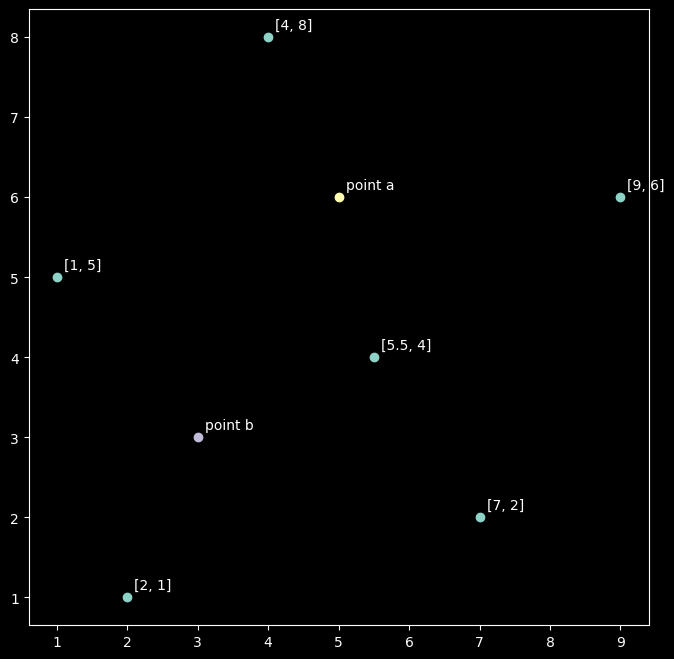

In [16]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(*zip(*z))
# print(*zip(*z))
n = [str(i) for i in z]

for i, txt in enumerate(n):
    plt.annotate(txt, (z[i][0] + 0.1, z[i][1] + 0.1))

plt.annotate("point a", list(map(lambda x: x + 0.1, pointa)))
plt.annotate("point b", list(map(lambda x: x + 0.1, pointb)))

plt.scatter(pointa[0], pointa[1])
plt.scatter(pointb[0], pointb[1])
plt.show()
plt.close(fig)

## Standard deviation

For any vector $x$, the vector $$\tilde{x}=x-\operatorname{avg}(x) \mathbf{1}$$ is called the associated **de-meaned** vector, obtained by subtracting from each entry of $x$ the mean value of the entries. (This is not standard notation; i.e., $\tilde{x}$ is not generally used to denote the de-meaned vector.) 

* The mean value of the entries of $\tilde{x}$ is zero, i.e., $\operatorname{avg}(\tilde{x})=0$. This explains why $\tilde{x}$ is called the de-meaned version of $x$; it is $x$ with its mean removed. 

* The de-meaned vector is useful for understanding how the entries of a vector deviate from their mean value. It is zero if all the entries in the original vector $x$ are the same.


In [17]:
# De-meaning is useful for understanding how entries of a vector deviate
# from the mean also gives us SD in terms of norm
def de_mean(x):
    return x - np.average(x)


def chop(expr, delta=1e-10):
    return np.ma.masked_inside(expr, -delta, delta).filled(0)


x = np.array([1, -2.2, 3])

print(f"the average of x: {np.average(x)}")
print(f"the de-mean of x: {de_mean(x)}")
print(f"the average of the de-mean of x: {np.average(de_mean(x)).round()}")
print(f"the average of the de-mean of x: {chop(np.average(de_mean(x)))}")


the average of x: 0.6
the de-mean of x: [ 0.4 -2.8  2.4]
the average of the de-mean of x: -0.0
the average of the de-mean of x: 0.0



The **standard deviation** of an $n$-vector $x$ is defined as the RMS value of the de-meaned vector $x-\operatorname{avg}(x) \mathbf{1}$, i.e.,
$$
\operatorname{std}(x)=\sqrt{\frac{\left(x_1-\operatorname{avg}(x)\right)^2+\cdots+\left(x_n-\operatorname{avg}(x)\right)^2}{n}}.
$$
This is the same as the RMS deviation between a vector $x$ and the vector all of whose entries are $\operatorname{avg}(x)$. It can be written using the inner product and norm as
$$
\operatorname{std}(x)=\frac{\left\|x-\left(\mathbf{1}^T x / n\right) \mathbf{1}\right\|}{\sqrt{n}}.
$$

* The standard deviation of a vector $x$ tells us the typical amount by which its entries deviate from their average value. 
* The standard deviation of a vector is zero only when all its entries are equal. 
* The standard deviation of a vector is small when the entries of the vector are nearly the same.

In [18]:
# Standard deviation is RMS of a de-meaned vector
# gives the typical amount that vector values deviate from mean
x = np.random.rand(100)


def stdev(x):
    return npl.norm(x - np.average(x)) / np.sqrt(len(x))


print(f"the standard deviation of x: {stdev(x):.3f}")
# print(f"the standard deviation of x: {np.std(x)}")

the standard deviation of x: 0.284


##### Average, RMS value, and standard deviation

The average, RMS value, and standard deviation of a vector are related by the formula
$$
\operatorname{rms}(x)^2=\operatorname{avg}(x)^2+\operatorname{std}(x)^2.
$$

In [19]:
LHS = rms(x) ** 2
RHS = np.average(x) ** 2 + np.std(x) ** 2
print(LHS)
print(RHS)

0.3168955881059776
0.3168955881059777


#### Example

> ##### Mean return and risk
>
> Suppose that an $n$-vector represents a time series of return on an investment, expressed as a percentage, in $n$ time periods over some interval of time. 
> 
> Its average gives the mean return over the whole interval, often shortened to its return. 
> 
> Its standard deviation is a measure of how variable the return is, from period to period, over the time interval, i.e., how much it typically varies from its mean, and is often called the (per period) risk of the investment. 
> 
> Multiple investments can be compared by plotting them on a risk-return plot, which gives the mean and standard deviation of the returns of each of the investments over some interval. 
> 
> A desirable return history vector has high mean return and low risk; this means that the returns in the different periods are consistently high.

In [20]:
a = np.ones(10)
print(f"the return of a is: {np.mean(a)},\nthe risk of a is: {np.std(a)}")

b = np.array([5, 1, -2, 3, 6, 3, -1, 3, 4, 1])
print(f"the return of b is: {np.mean(b)},\nthe risk of b is: {np.std(b)}")

c = np.array([5, 7, -2, 2, -3, 1, -1, 2, 7, 8])
print(f"the return of c is: {np.mean(c)},\nthe risk of c is: {np.std(c)}")

d = np.array([-1, -3, -4, -3, 7, -1, 0, 3, 9, 5])
print(f"the return of d is: {np.mean(d)},\nthe risk of d is: {np.std(d)}")

investments = {
    "a": a,
    "b": b,
    "c": c,
    "d": d,
}

investments

the return of a is: 1.0,
the risk of a is: 0.0
the return of b is: 2.3,
the risk of b is: 2.4103941586387903
the return of c is: 2.6,
the risk of c is: 3.7735924528226414
the return of d is: 1.2,
the risk of d is: 4.308131845707604


{'a': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'b': array([ 5,  1, -2,  3,  6,  3, -1,  3,  4,  1]),
 'c': array([ 5,  7, -2,  2, -3,  1, -1,  2,  7,  8]),
 'd': array([-1, -3, -4, -3,  7, -1,  0,  3,  9,  5])}

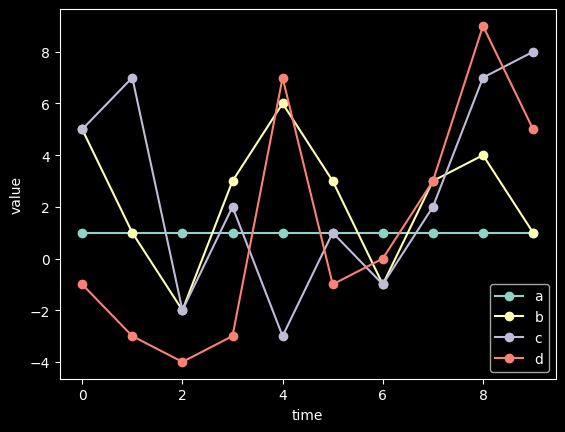

In [21]:
fig = plt.figure()
for key, value in investments.items():
    plt.plot(value, "o-", label=key)
plt.legend(loc=0)
plt.xlabel("time")
plt.ylabel("value")
plt.show()
plt.close(fig)


In [22]:
returns = []
risks = []

for item in investments.values():
    returns.append(np.mean(item))
    risks.append(np.std(item))

print(returns)
print(risks)

[np.float64(1.0), np.float64(2.3), np.float64(2.6), np.float64(1.2)]
[np.float64(0.0), np.float64(2.4103941586387903), np.float64(3.7735924528226414), np.float64(4.308131845707604)]


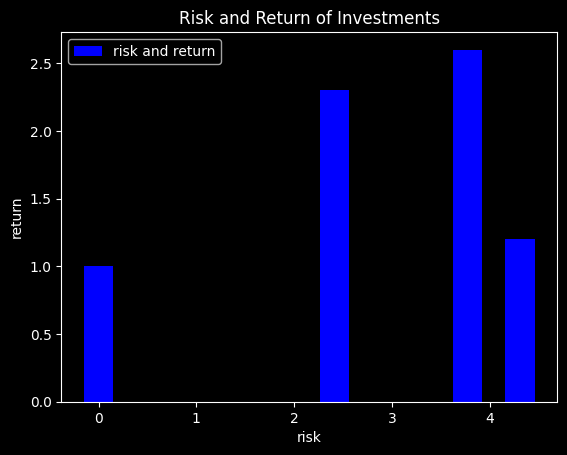

In [23]:
fig = plt.figure()
# plt.scatter(risks, returns, s=100, label="risk and return")
plt.bar(risks, returns, label="risk and return", color="blue", width=0.3)
plt.title("Risk and Return of Investments")
plt.legend(loc=0)
plt.xlabel("risk")
plt.ylabel("return")
plt.show()
plt.close(fig)

#### Standardization.

For any vector $x$, we refer to $\tilde{x}=x-\mathbf{a v g}(x) \mathbf{1}$ as the de-meaned version of $x$, since it has average or mean value zero. 

If we then divide by the RMS value of $\tilde{x}$ (which is the standard deviation of $x$), we obtain the vector
$$
z=\frac{x-\operatorname{avg}(x) \mathbf{1}}{\operatorname{std}(x)}
$$

This vector is called the **standardized version** of $x$. 
* It has mean zero, and standard deviation one. 
* Its entries are sometimes called the $z$-scores associated with the original entries of $x$. 
* For example, $z_4=1.4$ means that $x_4$ is $1.4$ standard deviations above the mean of the entries of $x$.
* The standardized values for a vector give a simple way to interpret the original values in the vectors. 

> For example, if an $n$-vector $x$ gives the values of some medical test of $n$ patients admitted to a hospital, the standardized values or $z$ scores tell us how high or low, compared to the population, that patient's value is. 
> 
> A value $ z_6=-3.2 $, for example, means that patient 6 has a very low value of the measurement; whereas $z_{22}=0.3$ says that patient 22's value is quite close to the average value.

In [24]:
# Sample data: test results of 30 patients
test_results = np.array(
    [
        85,
        90,
        78,
        92,
        88,
        75,
        95,
        100,
        82,
        87,
        91,
        89,
        76,
        84,
        93,
        77,
        94,
        81,
        86,
        80,
        79,
        83,
        97,
        99,
        74,
        72,
        96,
        73,
        70,
        68,
    ]
)

# Calculate mean and standard deviation
mean = np.mean(test_results)
std_dev = np.std(test_results)

# Calculate z-scores
z_scores = (test_results - mean) / std_dev

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print("Z-scores:", z_scores)

Mean: 84.47
Standard Deviation: 8.94
Z-scores: [ 0.05968488  0.61923058 -0.72367911  0.84304886  0.3954123  -1.05940653
  1.17877628  1.73832199 -0.27604255  0.28350316  0.73113972  0.50732144
 -0.94749739 -0.05222427  0.954958   -0.83558825  1.06686714 -0.38795169
  0.17159402 -0.49986083 -0.61176997 -0.16413341  1.40259456  1.62641285
 -1.17131567 -1.39513396  1.29068542 -1.28322481 -1.61895224 -1.84277052]


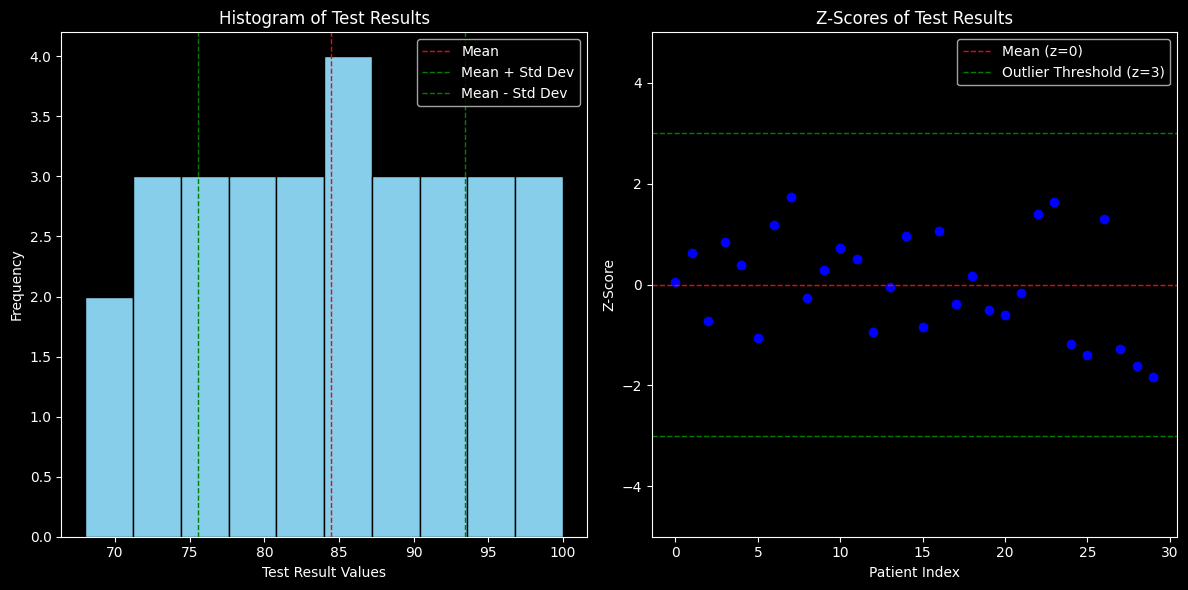

In [25]:
# Visualization 1: Histogram of test results
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(test_results, bins=10, color="skyblue", edgecolor="black")
plt.axvline(mean, color="red", linestyle="dashed", linewidth=1, label="Mean")
plt.axvline(
    mean + std_dev,
    color="green",
    linestyle="dashed",
    linewidth=1,
    label="Mean + Std Dev",
)
plt.axvline(
    mean - std_dev,
    color="green",
    linestyle="dashed",
    linewidth=1,
    label="Mean - Std Dev",
)
plt.title("Histogram of Test Results")
plt.xlabel("Test Result Values")
plt.ylabel("Frequency")
plt.legend()

# Visualization 2: Z-Score Plot
plt.subplot(1, 2, 2)
plt.scatter(range(len(z_scores)), z_scores, color="blue")
plt.axhline(0, color="red", linestyle="dashed", linewidth=1, label="Mean (z=0)")
outlier_threshold = 3
plt.axhline(
    outlier_threshold,
    color="green",
    linestyle="dashed",
    linewidth=1,
    label=f"Outlier Threshold (z={outlier_threshold})",
)
plt.axhline(-outlier_threshold, color="green", linestyle="dashed", linewidth=1)
plt.title("Z-Scores of Test Results")
plt.xlabel("Patient Index")
# plt.xticks(range(len(z_scores)))
plt.ylabel("Z-Score")
plt.ylim(-5, 5)
plt.legend()

plt.tight_layout()
plt.show()
plt.close(fig)

In [26]:
def standardize(x):
    return (x - np.average(x)) / rms(x - np.average(x))


x = np.random.randint(10, size=100)
# print(x)
z = standardize(x)

print(
    f"average: {np.mean(x)}\n"
    f"mean {np.std(x)}\n"
    f"standardized average: {chop(np.mean(z))}\n"
    f"standardized mean: {np.std(z).round()}"
)

average: 4.64
mean 2.7659356463952665
standardized average: 0.0
standardized mean: 1.0


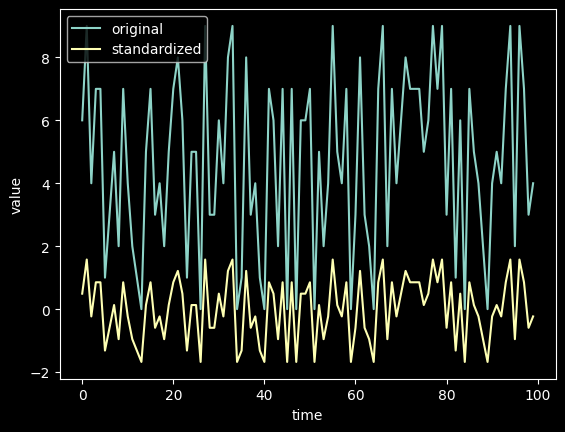

In [27]:
fig = plt.figure()
plt.plot(x, label="original")
plt.plot(z, label="standardized")
plt.legend(loc=0)
plt.xlabel("time")
plt.ylabel("value")
plt.show()
plt.close(fig)

## Angle

##### Angle between vectors.

The angle between two nonzero vectors $a, b$ is defined as
$$
\theta=\arccos \left(\frac{a^T b}{\|a\|\|b\|}\right)
$$
where arccos denotes the inverse cosine, normalized to lie in the interval $[0, \pi]$. In other words, we define $\theta$ as the unique number between 0 and $\pi$ that satisfies
$$
a^T b=\|a\|\|b\| \cos \theta .
$$

In [28]:
def ang(x, y):
    return np.arccos(np.inner(x, y) / (npl.norm(x) * npl.norm(y)))


a = [1, 2, -1]
b = [2, 0, -3]

print(f"the angle between a and b is: {ang(a, b):.2f} radians")
print(f"the angle between a and b is: {ang(a, b) * (360 / (2 * np.pi)):.2f} degrees")

the angle between a and b is: 0.97 radians
the angle between a and b is: 55.52 degrees


#### Examples

> ##### Spherical distance.
>
> Suppose $a$ and $b$ are 3-vectors that represent two points that lie on a sphere of radius $R$ (for example, locations on earth). The spherical distance between them, measured along the sphere, is given by $R\times\Delta(a, b)$, where $\Delta(a, b)$ is the angle between the points.

Spherical Distance between points A and B: 0.2710
Euclidean Distance between points A and B: 0.2702
Spherical distance >= Euclidean distance: True


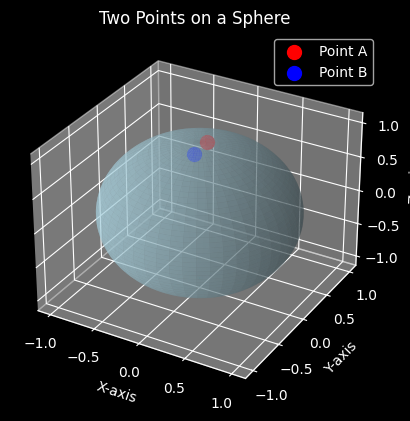

In [29]:
from mpl_toolkits.mplot3d import Axes3D


def generate_random_point_on_sphere(radius):
    theta = np.random.uniform(0, np.pi)  # Polar angle
    phi = np.random.uniform(0, 2 * np.pi)  # Azimuthal angle
    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)
    return np.array([x, y, z])


def spherical_distance(a, b, radius):
    return radius * ang(a, b)


def euclidean_distance(a, b):
    return np.linalg.norm(a - b)


def plot_sphere_and_points(a, b, radius):
    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, color="lightblue", alpha=0.5)

    # Plot points
    ax.scatter(*a, color="red", s=100, label="Point A")
    ax.scatter(*b, color="blue", s=100, label="Point B")

    # Labels and legend
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Two Points on a Sphere")
    ax.legend()
    plt.show()
    plt.close(fig)


R = 1  # Radius of the sphere
point_a = generate_random_point_on_sphere(R)
point_b = generate_random_point_on_sphere(R)

s_distance = spherical_distance(point_a, point_b, R)
e_distance = euclidean_distance(point_a, point_b)
print(f"Spherical Distance between points A and B: {s_distance:.4f}")
print(f"Euclidean Distance between points A and B: {e_distance:.4f}")
print(f"Spherical distance >= Euclidean distance: {s_distance >= e_distance}")

plot_sphere_and_points(point_a, point_b, R)

> Document similarity via angles.
>
> If $n$-vectors $x$ and $y$ represent the word counts for two documents, their angle $L(x, y)$ can be used as a measure of document dissimilarity. (When using angle to measure document dissimilarity, either word counts or histograms can be used; they produce the same result.)

In [30]:
from collections import Counter
import re


def create_word_count_vector(doc1, doc2):
    # Combine documents to create a vocabulary
    words = re.findall(r"\w+", doc1.lower()) + re.findall(r"\w+", doc2.lower())
    vocabulary = set(words)

    # Count words in each document
    count1 = Counter(re.findall(r"\w+", doc1.lower()))
    count2 = Counter(re.findall(r"\w+", doc2.lower()))

    # Create vectors based on the vocabulary
    vector1 = np.array([count1[word] for word in vocabulary])
    vector2 = np.array([count2[word] for word in vocabulary])

    return vector1, vector2


# Example documents
doc1 = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur."""
doc2 = """Lorem ipsum dolor amet, consectetur adipiscing elit. Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit."""

# Create word count vectors
vector1, vector2 = create_word_count_vector(doc1, doc2)

# Calculate the angle between the two documents
angle = ang(vector1, vector2)
print(f"The angle between the two documents is: {np.degrees(angle):.2f} degrees")


The angle between the two documents is: 74.50 degrees


The angle between the two documents is: 74.50 degrees


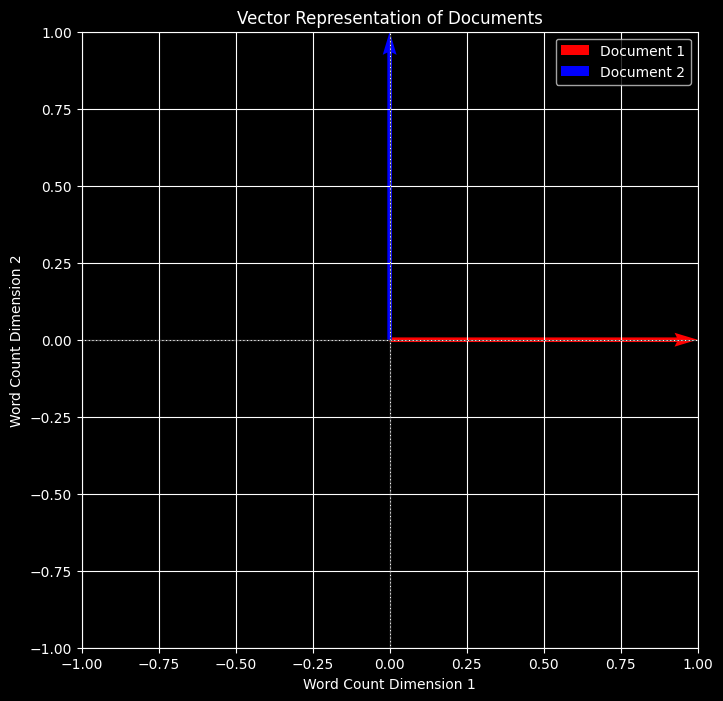

In [31]:
def plot_vectors(x, y):
    plt.figure(figsize=(8, 8))
    plt.quiver(
        0,
        0,
        x[0],
        x[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="r",
        label="Document 1",
    )
    plt.quiver(
        0,
        0,
        y[0],
        y[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="b",
        label="Document 2",
    )

    # Set limits and labels
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color="black", linewidth=0.5, ls="--")
    plt.axvline(0, color="black", linewidth=0.5, ls="--")
    plt.grid()
    plt.title("Vector Representation of Documents")
    plt.xlabel("Word Count Dimension 1")
    plt.ylabel("Word Count Dimension 2")
    plt.legend()
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()


# Calculate the angle between the two documents
angle = ang(vector1, vector2)
print(f"The angle between the two documents is: {np.degrees(angle):.2f} degrees")

# Plot the vectors
plot_vectors(vector1, vector2)


#### Correlation coefficient.

Suppose $a$ and $b$ are $n$-vectors, with associated de-meaned vectors
$$
\tilde{a}=a-\operatorname{avg}(a) \mathbf{1}, \quad \tilde{b}=b-\operatorname{avg}(b) \mathbf{1}.
$$

Assuming these de-meaned vectors are not zero (which occurs when the original vectors have all equal entries), we define their correlation coefficient as
$$
\rho=\frac{\tilde{a}^T \tilde{b}}{\|\tilde{a}\|\|\tilde{b}\|}.
$$

Thus, $\rho=\cos \theta$, where $\theta=\angle(\tilde{a}, \tilde{b})$. We can also express the correlation coefficient in terms of the vectors $u$ and $v$ obtained by standardizing $a$ and $b$. With $u=\tilde{a} / \operatorname{std}(a)$ and $v=\tilde{b} / \operatorname{std}(b)$, we have
$$
\rho=u^T v / n.
$$
(We use $\|u\|=\|v\|=\sqrt{n}$.)

* This is a symmetric function of the vectors: 
  The correlation coefficient between $a$ and $b$ is the same as the correlation coefficient between $b$ and $a$.
  
* The CauchySchwarz inequality tells us that the correlation coefficient ranges between $-1$ and $+1$. 
* For this reason, the correlation coefficient is sometimes expressed as a percentage. 
* For example, $\rho=30 \%$ means $\rho=0.3$. When $\rho=0$, we say the vectors are uncorrelated. (By convention, we say that a vector with all entries equal is uncorrelated with any vector.)

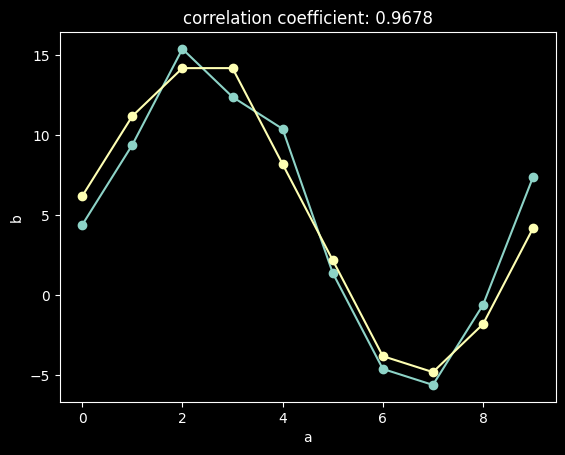

In [32]:
def correl_coef(a, b):
    a_tilde = a - np.average(a)
    b_tilde = b - np.average(b)
    return (np.inner(a_tilde, b_tilde)) / (npl.norm(a_tilde) * npl.norm(b_tilde))


a = np.array([4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4])
b = np.array([6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2])

# a = np.array([4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1])
# b = np.array([5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5])

# a = np.array([-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0])
# b = np.array([5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2])

fig = plt.figure()
plt.plot(range(len(a)), a, "-o", label="a")
plt.plot(range(len(b)), b, "-o", label="b")
plt.xlabel("a")
plt.ylabel("b")
plt.title(f"correlation coefficient: {correl_coef(a, b):.4f}")
plt.show()
plt.close(fig)

## Complexity

* Computing the norm of an $n$-vector requires $n$ multiplications (to square each entry), $n-1$ additions (to add the squares), and one squareroot. Even though computing the squareroot typically takes more time than computing the product or sum of two numbers, it is counted as just one flop. So computing the norm takes $2 n$ flops.

* The cost of computing the RMS value of an $n$-vector is the same, since we can ignore the two flops involved in division by $\sqrt{n}$.

* Computing the distance between two vectors costs $3 n$ flops, and computing the angle between them costs $6 n$ flops.

All of these operations have order $n$.

* De-meaning an $n$-vector requires $2 n$ flops ( $n$ for forming the average and another $n$ flops for subtracting the average from each entry).

* The standard deviation is the RMS value of the de-meaned vector, and this calculation takes $4 n$ flops ( $2 n$ for computing the de-meaned vector and $2 n$ for computing its RMS value).

* We can suggests a slightly more efficient method with a complexity of $3 n$ flops: first compute the average ( $n$ flops) and RMS value ( $2 n$ flops), and then find the standard deviation as $\operatorname{std}(x)=\left(\mathbf{r m s}(x)^2-\mathbf{a v g}(x)^2\right)^{1 / 2}$.
* Standardizing an $n$-vector costs $5 n$ flops.
* The correlation coefficient between two vectors costs $10 n$ flops to compute.

These operations also have order $n$.

* As a slightly more involved computation, suppose that we wish to determine the nearest neighbor among a collection of $k$ $n$-vectors $z_1, \ldots, z_k$ to another $n$-vector $x$. (This will come up in the next chapter.) The simple approach is to compute the distances $\left\|x-z_i\right\|$ for $i=1, \ldots, k$, and then find the minimum of these. (Sometimes a comparison of two numbers is also counted as a flop.) The cost of this is $3 \mathrm{kn}$ flops to compute the distances, and $k-1$ comparisons to find the minimum. The latter term can be ignored, so the flop count is $3 \mathrm{kn}$. The order of finding the nearest neighbor in a collection of $k$ $n$-vectors is $k n$.